# Exercise 3.3: Logistic Regression vs. LDA 

In this part, you will explore the choice between Logistic Regression and Linear Discrimnant Analysis for a given dataset. In addition, you will learn how to visualize the probabilistic output of Logistic Regression.

In [2]:
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as Sk_LogR
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from mpl_toolkits.mplot3d import Axes3D

## Optimization function of Logistic Regression

In your lecture slides, the following cost function for Logistic Regression has been introduced and needs to get minimized to determine the optimal choice of the parameters $\mathbf{w}$:

\begin{equation}
J_{1}(w) = \sum_{i=1}^{N_{samples}} \ln(\exp(-\mathbf{y_{i}}(\mathbf{w}^{\rm T}\mathbf{x_{i}}))+1)
\end{equation}

### Q3.3.1 Assuming linear separability of a given data set, what can happen to the weights $\mathbf w$ when minimizing the cost function $J_{1}(\mathbf{w})$? Why is this a problem?
    A: The weights can become abnormally large to represent outliers or overly dominant attributes of data. While such weights are derived from training, they may not be suitable for test data. In the case of logistic regression, the loss function can be non-convex, which introduces local optimas and saddle-points to the energy landscape of the function. This essentially means that during training the weights may pre-maturely "coverge" leading to poor estimates of data.

__Hint:__  Assume it exists a weight vector $\mathbf{\tilde w}$ such that $\mathbf{y_{i}}(\mathbf{\tilde w}^{\rm T}\mathbf{x_{i}}) > 0$ for all sample points $i$. The class labels are defined as $y_{i}=\{-1,1\}$.


---------------------------------------------------

A more stable estimate for $\mathbf{w}$ can be achieved when using the concept of __Regularization__. Adding an additional term $J_{2}(\mathbf{w}) = \frac{1}{2}\mathbf{w}^{\rm T}\mathbf{w}$ to the cost function modifies the overall cost function $J(\mathbf{w},C)$ to: 

\begin{equation}
J(w,C) = J_{1}(\mathbf{w},C) + J_{2}(\mathbf{w}) = C\cdot \sum_{i=1}^{N_{samples}} \ln(\exp(-\mathbf{y}(\mathbf{w}^{\rm T}\mathbf{X}))+1) + \frac{1}{2}\mathbf{w}^{\rm T}\mathbf{w}
\end{equation}

Note, that the so-called regularization parameter $C$ is a fixed value and determines the relation of the second cost function $J_{2}(w)$ with respect to the first cost function $J_{1}(w)$.

### Q3.3.2 Which role has the additional cost function $J_{2}(w)$?
    A: ?? Prolly helps in making the landscape more convex ?? Or maybe has something to do with LDA/PCA ??
    check this out: https://towardsdatascience.com/optimization-loss-function-under-the-hood-part-ii-d20a239cde11
    - seems to be a so called regularization term that makes sure weights don't get punsihed too hard (which might result in underfitting)


## Evaluate and visualize the output of a Logistic Regression model

__Tasks:__ 
1. Visualize the given data set using the class labels. 
2. Lookup the scikit-learn toolbox implementation of a Logistic Regression model. Then train a model on the given training data. Please make sure that you use an "L2-penalty" for regularization and set your regularization parameter to C = 1.
3. Use your trained Logistic Regression model to predict the class labels of the test data and report on the classification performance.
4. Inspect the given function "plot_probabilityMap" and use it to visualize the probability map of class "1" of your trained Logistic Regression model using the test data set as an input.

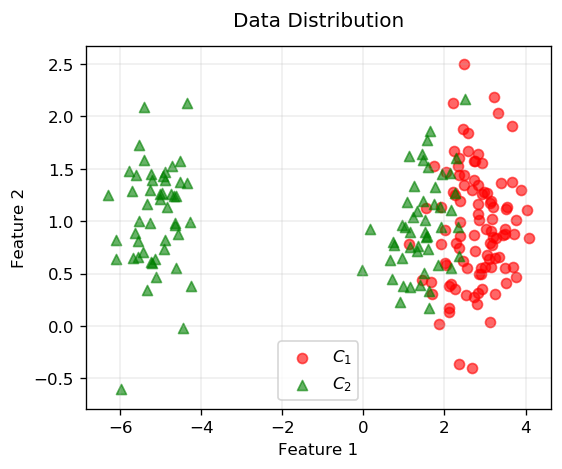

In [3]:
ds_trainData = 'data/spread_train.data'
ds_trainLabels ='data/spread_train.labels'
ds_testData = 'data/spread_test.data'
ds_testLabels ='data/spread_test.labels'

# load training data
X_train = np.loadtxt(ds_trainData)
y_train = np.loadtxt(ds_trainLabels)

# load test data
X_test = np.loadtxt(ds_testData)
y_test = np.loadtxt(ds_testLabels)

# (1.)-> Scatter-plot of your 2D-training data using the class labels of the training data
%matplotlib inline
f = plt.figure(dpi=120, figsize=(5,4))
X = np.vstack((X_train, X_test))
y = np.hstack((y_train, y_test))
# ax = f.add_subplot(111, projection='3d')
ax=f.add_subplot(111)
# X = X_train; y= y_train
ax.scatter(X[y==1][:,0], X[y==1][:,1], marker="o", color="r", alpha=0.6, label=r"$C_1$")
ax.scatter(X[y==0][:,0], X[y==0][:,1], marker="^", color="g", alpha=0.6, label=r"$C_2$")
ax.legend()
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
# ax.set_zlabel("Class lavel")
ax.set_title("Data Distribution", pad=12)
ax.grid(True, lw=0.2)
# plt.draw()
plt.show()


In [4]:
# (2.) Train a logistic regression model
def doLogReg(X, y):
    """Logistic Regression, aka: logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier."""
#     Sk_LogR(penalty="l2", C=1).fit(X, y_11)
    return Sk_LogR(penalty="l2", C=1,random_state=0).fit(X, y)
logFit = doLogReg(X_train, y_train)
# (3.) Predict the class labels on the test data and return a classfication rate (0-1-Loss)
y_hat = logFit.predict(X_test)
# y_hat = logFit.predict(X_train)
skore_tr = logFit.score(X_train, y_train)
skore_tst = logFit.score(X_test, y_test)

print("Prediction accuracy on training data is {:.1f} %.\n".format(skore_tr*100))
print("Prediction accuracy on test data is {:.1f} %.".format(skore_tst*100))

Prediction accuracy on training data is 92.0 %.

Prediction accuracy on test data is 89.0 %.


C:\Users\Ana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [5]:
def plot_probabilityMap(model, X, y, y_pred, plot_means, class_index):
    '''visualizes the output of the applied models with a
    probability map
    INPUT: 
    'model'-> scikit-learn like instance of classifier models with built-in method 'predict_proba' available
    'X' -> data matrix of size NxD
    'y' -> true class labels
    'y_pred' -> predicted class labels
    'plot_means' -> only for LDA: adding class means to the plot
    'class_index' -> probability map for class, either '0' or '1'
    
    OUTPUT:
    splot: figure handle of the plot
    '''
    splot = plt.figure(dpi=150)
    
    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    # class 0: true positives vs. false positives
    plt.plot(X0_tp[:, 0], X0_tp[:, 1], 'o', color='red')
    plt.plot(X0_fp[:, 0], X0_fp[:, 1], 'o', color='salmon')  # dark red

    # class 1:
    plt.plot(X1_tp[:, 0], X1_tp[:, 1], 'o', color='blue')
    plt.plot(X1_fp[:, 0], X1_fp[:, 1], 'o', color='lightskyblue')  # dark blue

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, class_index].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='YlOrBr')
    # colorbar assigning the probabilities
    plt.colorbar()
        
    # plot the contour of the 50 probability
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='k')

    # plot class means (only makes sense for LDA)
    if plot_means: 
        plt.plot(model.means_[0][0], model.means_[0][1],
                 'o', color='black', markersize=10)
        plt.plot(model.means_[1][0], model.means_[1][1],
                 'o', color='black', markersize=10)

    return splot

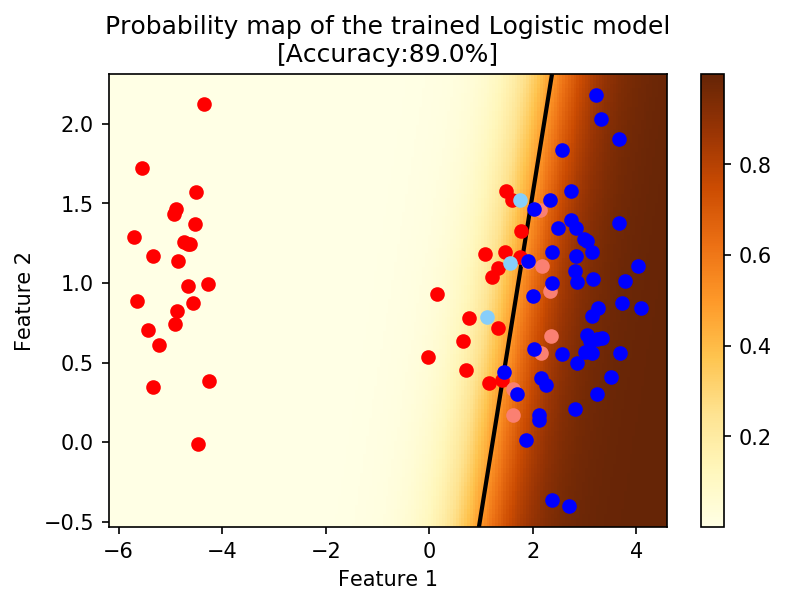

In [6]:
# (4.): Visualize the Logistic Regression Output
# Hint: set the flag "plot_means" to False as the Logistic Regression Model does not depend on the class means
fig_LogReg = plot_probabilityMap(logFit, X_test, y_test, y_hat, plot_means=False, class_index=1)


plt.title("Probability map of the trained Logistic model"+"\n"+"[Accuracy:"+str(logFit.score(X_test, y_test)*100)+"%]")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Comparison with performance of the LDA 

For comparison, you now need to train and evaluate an LDA model on the same data set and evaluate its performance.

__Tasks:__
1. Lookup the scikit-learn toolbox implementation for an LDA model. Then train a model on the given training data. Please specify your solver to "eigen".
2. Use your trained LDA model to predict the class labels of the test data and report on the classification performance.
3. Apply the given function "plot_probabilityMap" to visualize the probability map of class "1" of your trained LDA model taking the test data set as an input. Use the input parameter of the function to visualize the class means.

In [7]:
# (1) Train an LDS model

ldaFit = LDA().fit(X_train, y_train)
# (3.) Predict the class labels on the test data and return a classfication rate (0-1-Loss)
y_hat_lda = ldaFit.predict(X_test)
# y_hat = logFit.predict(X_train)
skore_lda_tr = ldaFit.score(X_train, y_train)
skore_lda_tst = ldaFit.score(X_test, y_test)




# (2) Predict the class labels on the test data and return a classfication rate (0-1-Loss)
print("Prediction accuracy on training data is {:.1f} %.\n".format(skore_lda_tr*100))
print("Prediction accuracy on test data is {:.1f} %.".format(skore_lda_tst*100))




Prediction accuracy on training data is 74.0 %.

Prediction accuracy on test data is 78.0 %.


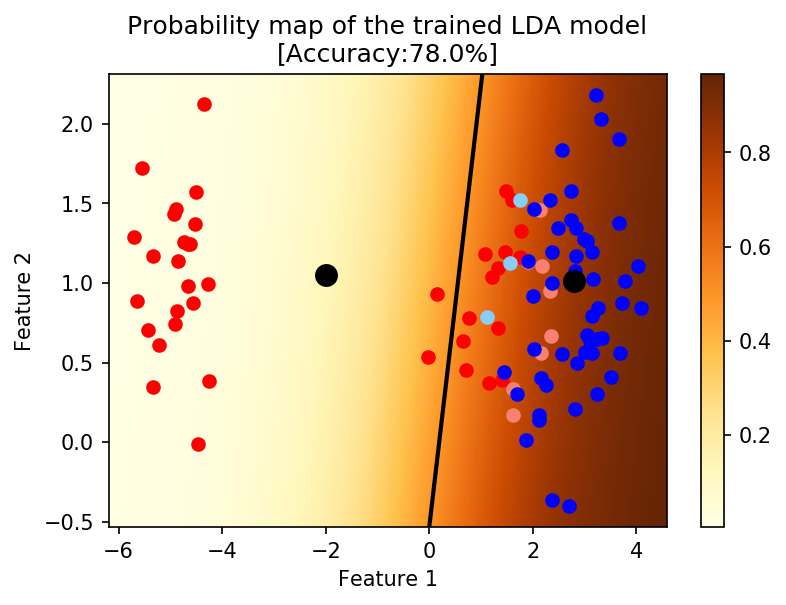

In [8]:
# (3): Visualize the LDA output
fig_LogReg = plot_probabilityMap(ldaFit, X_test, y_test, y_hat, plot_means=True, class_index=1)

plt.title("Probability map of the trained LDA model"+"\n"+"[Accuracy:"+str(ldaFit.score(X_test, y_test)*100)+"%]")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


#### Q3.3.3) Compare the performance of the Logistic Regression model with the LDA for the given dataset. Do you observe a severe difference in the performance of both models? Can you explain the reason?
__Hint__: You can compare the two decision boundaries.

    A: There is a comparable difference between the accuracy of LDA and Logistic Regression (LR) on this data set. LR performs much better than LDA. Since, the variance of the two class means do not appear to be identical, LDA can not find the best decision boundary between the two classes. However, LR is able to fit the decision boundary very accurately due the he nature of sigmoidal function which informs us about the probability distribution of classes and helps in training a better fit of the decision boundary (linear fit).



#### Q3.3.4) How can you estimate a probability from an LDA classifier? Remember that this is not a probabilistic method by default.
 
    A: We expect LDA to represent a Bernoulli distribution pf the probabilities of Classes. That is, anything to the left of the decision boundary is just class 1, and anything on the right is class 2.
